# **UTS | Data (https://pta.trunojoyo.ac.id/) TF-IDF**

Data scraping atau yang juga sering disebut data extraction merupakan teknik atau metode otomatisasi yang memungkinkan seseorang untuk mengekstrak data dari sebuah website, database, aplikasi enterprise, atau sistem legacy yang kemudian dapat menyimpannya ke dalam sebuah file dengan format tabular atau spreadsheet.

Libary untuk scraping tersedia banyak, namun untuk kasus ini menggunakan libary `"BeautifulSoup"`

---
Untuk Pengambilan data dari Web PTA dapat dilihat pada link berikut : https://lala09-erha.github.io/prosaindata/notebooks2.html

## Proses Pengambilan data CSV

In [146]:
import pandas as pd
path = "/content/drive/MyDrive/prosaindata/DataCrawling/Data_pta.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,NIM,Judul,Penulis,Abstrak,Program Studi
0,0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,A.Ubaidillah S.Kom,Sistem informasi akademik (SIAKAD) merupakan s...,Teknik Informatika
1,1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,",Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika
2,2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom",Web server adalah sebuah perangkat lunak serve...,Teknik Informatika
3,3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,Penjadwalan kuliah di Perguruan Tinggi merupak...,Teknik Informatika
4,4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika
...,...,...,...,...,...,...
855,855,130411100057,Sistem Peramalan Stok Barang dengan menggunaka...,Devi Editya Susanti,Toko tas Deeolshop menjual berbagai macam tas ...,Teknik Informatika
856,856,150411100053,Sistem Rekomendasi Dalam Menentukan Posisi Dep...,Kumayyah,Sepak bola adalah salah satu olahraga yang saa...,Teknik Informatika
857,857,150411100038,MULTI CRITERIA DECISION MAKING UNTUK MENENTUKA...,Ahmad Faris Ihsan,Perguruan Tinggi merupakan salah satu jenjang ...,Teknik Informatika
858,858,160411100032,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,Investasi saham selama ini memiliki resiko ker...,Teknik Informatika


In [147]:
path = "/content/drive/MyDrive/prosaindata/DataCrawling/dataset-baru.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,Abstrak,Kategori
0,0,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,1,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,2,Web server adalah sebuah perangkat lunak serve...,RPL
3,3,Penjadwalan kuliah di Perguruan Tinggi me...,KOMPUTASI
4,4,Seiring perkembangan teknologi yang ada diduni...,RPL
...,...,...,...
800,804,Investasi saham selama ini memiliki resiko ker...,KOMPUTASI
801,805,Information Retrieval (IR) merupakan pengambil...,KOMPUTASI
802,806,Klasifikasi citra merupakan proses pengelompok...,KOMPUTASI
803,807,Identifikasi atribut pejalan kaki merupakan sa...,KOMPUTASI


## Preprocessing Data 

### Seleksi Column

Drop Column yang dirasa tidak dibutuhkan.

In [148]:
label = df['Kategori'].tolist()
data = df['Abstrak'].tolist()


### Install Libary Sastrawi

Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya.

In [149]:
!pip install Sastrawi
!pip install symspellpy
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Inisialisasi Variable

In [150]:
import string 
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from symspellpy import SymSpell ,Verbosity
import os
import requests
import numpy as np
import joblib


PreProsecessing data:
- Cleaning Text
- tokenisasi data
- menghapus stopword
- mengubah menjadi lowercase dan menghapus spesial char
- menghapus angka
- menghapus whitespace
- spell checker
- stemming
- mengubah label menjadi angka
- implementasi ke TF-IDF
- implementasi ke PCA
- split Data

### Cleaning Text

Untuk Cleaning text atau pembersihan kata dari tag yang tidak diharapkan sudah dilakukan pada tahap crawling, sehingga text yang akan dikelolah bebas dari tag html atau `abstrak` yang kosong. Sehingga pada tahap ini, hanya mempersiapkan data yang akan dilakukan preprocessing

In [151]:
predata = data

### Tokenisasi Data

menjadikan 1 kalimat menjadi per kata 

In [152]:
for i in predata:
  predata[predata.index(i)] = i.split()

### Menghapus StopWord dengan sastrawi


Berikut Kata-kata yang akan dihapus

In [153]:
factory = StopWordRemoverFactory()
stopwords =  factory.create_stop_word_remover()
print(factory.get_stop_words())

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses Penghapusan

In [154]:
for i in predata:
  for j in i:
    predata[predata.index(i)][i.index(j)] = stopwords.remove(j)

### Mengubah menjadi lower case dan Memeriksa Spesial char

Menghilangkan karakter atau simbol pada text, seperti ` [!”#$%&’()*+,./:;<=>?@[\]^_'{|}~]` 

In [155]:
punctuation = "!@#$%^&*()/\[]=_+<>?:.,;" 
for i in predata:
  for j in i:
    predata[predata.index(i)][i.index(j)] = j.translate(str.maketrans("","",punctuation)).lower()
  


In [156]:
for i in predata:
  for j in i:
    try:
      if(j[0] =='-'):
        predata[predata.index(i)][i.index(j)] = j.replace('-','')
    except:
      pass

### Menghapus Angka

In [157]:
for i in predata:
  for j in i:
    predata[predata.index(i)][i.index(j)] = j.translate(str.maketrans("","",string.digits))

### Menghapus Whitespase (Karakter Kosong)

In [158]:
for i in predata:
  for j in i:
    try:
      if(len(j) <=2):
        predata[predata.index(i)][i.index(j)] = predata[predata.index(i)].remove(j)
    except:
      pass

In [159]:
for i in predata:    
  for j in range(i.count('')):
    i.remove('')
  for j in range(i.count(None)):
    i.remove(None)

### SPELL  checker

INISIALISASI FUNGSI

Mengambil kumpulan kata dari `KBBI` serta kamus `bahasa inggris` karena dalam abstrak tidak hanya berisikan bahasa indonesia, namun juga bahasa inggris.

In [160]:
# bahasa indonesia
master = "https://raw.githubusercontent.com/Wikidepia/indonesian_datasets/master/dictionary/wordlist/data/wordlist.txt"
req = requests.get(master)
WORDS = req.text
WORDS = WORDS.replace('\n', " ")
WORDS = WORDS.split()

# bahasa inggris
master1 = "https://raw.githubusercontent.com/dolph/dictionary/master/popular.txt"
req1 = requests.get(master1)
WORDS1 = req1.text
WORDS1 = WORDS1.replace('\n', " ")
WORDS1 = WORDS1.split()


Jika menggunakan tools dan kamus pada https://norvig.com/spell-correct.html , membutuhkan ram dan waktu yang banyak. sehingga tidak menggunakan cara tersebut untuk spell checker

In [161]:
# def P(word, N=len(WORDS)):
#     # "Probability of `word`."  
#     # print(WORDS.index(word))  
#     try:
#       return WORDS[WORDS.index(word)] / N
#     except:
#       pass

# def correction(word):
#     # "Most probable spelling correction for word."
#     try:      
#       return (list(candidates(word))[0])
#     except:
#       pass

# def candidates(word):
#     # "Generate possible spelling corrections for word."
#     return ( known(edits1(word)) or known(edits2(word)))

# def known(words):
#     # "The subset of `words` that appear in the dictionary of WORDS."
#     return set(w for w in words if w in WORDS)

# def edits1(word):
#     # "All edits that are one edit away from `word`."
#     letters    = 'abcdefghijklmnopqrstuvwxyz'
#     splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)] # [('', 'kemarin'), ('k', 'emarin'), ('ke', 'marin'), dst]
#     deletes    = [L + R[1:]               for L, R in splits if R] # ['emarin', 'kmarin', 'kearin', dst]
#     transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] # ['ekmarin', 'kmearin', 'keamrin', dst]
#     replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters] # ['aemarin', 'bemarin', 'cemarin', dst]
#     inserts    = [L + c + R               for L, R in splits for c in letters] # ['akemarin', 'bkemarin', 'ckemarin', dst]
#     return set(deletes + transposes + replaces + inserts)

# def edits2(word):
#     # "All edits that are two edits away from `word`."
#     return (e2 for e1 in edits1(word) for e2 in edits1(e1))


karena membutuhkan ram dan waktu yang banyak jadi menggunakan cara yang lain yaitu, menggunakan kata yang familiar pada kamus. Dimana kata akan di cek satu satu persatu dengan satu per satu huruf.



---
Contoh:
- apa

kata `"apa"` akan dicek satu kata per kata, **perulangan 1** adalah `a` yang dicek, begitu seterusnya. sehingga menghasilkan paling banyak keluar pada bahasa indonesia, lalu mengambil kata yang dimasukkan pada list [-1]

Mengambil Kata Yang Sering Keluar Namun tidak termasuk diantara Bahasa indonesia dan Bahasa inggris. Dengan Asumsi jika sering keluar maka kosa kata benar namun belum ada di kamus manapun

In [162]:
# tempunq = []
# for i in range (len(predata)):
#   for j in range(len(predata[i])):
#     if(predata[i][j] in WORDS):
#       pass
#     elif (predata[i][j] in WORDS1):
#       pass    
#     else:
#       tempunq.append(predata[i][j])

In [163]:
# values, counts = np.unique(tempunq, return_counts=True)
# temp_new = list(map(list,zip(values,counts)))
# tempnew = []
# # check jika count kurang dari 10 remove
# for i in temp_new:
#   if(i[1] >= 10):
#     tempnew.append(i[0])
#     # temp_new.remove(i)

In [164]:
# def koreksi(word):
#   ind = 0
#   w = 0
#   w2 = 0
#   t = 0
#   while ind < len(word):
#     for i in WORDS:
#       if(word[0:ind] in i):
#         w =ind
#     for i in WORDS1:
#       if(word[0:ind] in i):
#         w2 =ind    
#     for i in tempnew:
#       if(word[0:ind] in i):
#         t =ind    
#     ind+=1
#   return [w,w2,t]


# def kandidat(values):
#   maxind = pd.Series(values)
#   return maxind.idxmax()

# def check(word):
#   hasilkor = koreksi(word)
#   hasil = kandidat(hasilkor)
#   tmpat =[]
#   ind = 0
#   # check word termasuk bahasa apa
#   if(hasil == 0):
#     while ind < len(word):
#       for i in range(len(WORDS)):
#         if(word[0:ind] in WORDS[i]):
#           tmpat.append(WORDS[i])
#       ind+=1
#   elif(hasil==1):
#     while ind < len(word):
#       for i in range(len(WORDS1)):
#         if(word[0:ind] in WORDS1[i]):
#           tmpat.append(WORDS1[i])
#       ind+=1
#   elif(hasil==2):
#     while ind < len(word):
#       for i in range(len(tempnew)):
#         if(word[0:ind] in tempnew[i]):
#           tmpat.append(tempnew[i])
#       ind+=1

#   return tmpat[-1]

In [165]:
# for i in range (len(predata)):
#   for j in range(len(predata[i])):
#     if(predata[i][j] in WORDS):
#       pass
#     elif (predata[i][j] in WORDS1):
#       pass
#     elif (predata[i][j] in tempnew):
#       pass    
#     else:
#       try:
#         if(predata[i][j][0] =='-'):
#           predata[i][j] = predata[i][j].replace('-','')
#           test = check(predata[i][j])
#           predata[i][j] = test
#         else:
#           test = check(predata[i][j])
#           predata[i][j] = test
#       except:
#           pass


Lalu melakukan langkah untuk menghapus Stopword dan char spesial kembali

In [166]:
# for i in predata:    
#   for j in range(i.count('-')):
#     i.remove('-')
#   for j in range(i.count(None)):
#     i.remove(None)

In [167]:
# punctuation = "!@#$%^&*()’_+<>?:.,;!@#$%^&*()/\[]=_" 
# for i in predata:
#   for j in i:
#     predata[predata.index(i)][i.index(j)] = j.translate(str.maketrans("","",punctuation)).lower()
  


In [168]:
# for i in range(len(predata)):
#   predata[i] = " ".join(predata[i])

### Stemming Kata Dengan Sastrawi

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). 



---

proses Stemming dilakukan belakangan karena tidak ingin melakukan proses ini dua kali, jadi dilakukan setelah proses Spell Checker. jika dilakukan sebelumnya akan ada kata yang mengandung arti yang sama namun penulisan yang salah dan ketika di spell akan menghasilkan dua kata, dimana dua kata tersebut mengandung makna yang sama.


---

- Misalnya proses stemming sebelum  checker kata `“mendengarkan”`, `“medengarkan”` ditransformasi menjadi kata `“dengar”` , `“medengarkan”`.

- Misalnya proses stemming sesudah checker kata `“medengarkan”` akan dirubah dahulu menjadi `“mendengarkan”` sehingga menghasilkan  `“dengar”`

In [169]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()
# for i in predata:
#   predata[predata.index(i)] = stemmer.stem(i)


In [170]:
# df['Abstrak'] = predata

menyimpan data yang sudah diproses dengan berbagai proses diatas

In [171]:
# path = "/content/drive/MyDrive/prosaindata/DataCrawling/new_new_Data_pta.csv"

# # # save to csv

# if( os.path.exists(path) == True):
#     os.remove(path)
# df.to_csv(path)

### Mengambil data yang sudah dilakukan proses sebelumnya

In [172]:
path = "/content/drive/MyDrive/prosaindata/DataCrawling/new_new_Data_pta.csv"
data = pd.read_csv(path)
data

,Unnamed: 0.1,Unnamed: 0,Abstrak,Kategori
0,0,0,sistem informasi akademik sia rupa sistem info...,RPL
1,1,1,jalan koneksi jaring komputer lancar ganggu ru...,RPL
2,2,2,web server buah perangkat lunak server fungsi ...,RPL
3,3,3,jadwal kuliah guru tinggi rupa masalah komplek...,KOMPUTASI
4,4,4,iring kembang teknologi didik muncul teknologi...,RPL
...,...,...,...,...
800,800,804,investasi saham lama milik resiko rugi sangat ...,KOMPUTASI
801,801,805,information retrieval rupa ambil informasi sim...,KOMPUTASI
802,802,806,klasifikasi citra rupa proses kelompok piksel ...,KOMPUTASI
803,803,807,identifikasi atribut pejal kaki rupa salah sat...,KOMPUTASI


### Mengubah Label menjadi angka

In [173]:
data['Kategori'] = pd.Categorical(data["Kategori"])
data["Kategori"] = data["Kategori"].cat.codes
data

,Unnamed: 0.1,Unnamed: 0,Abstrak,Kategori
0,0,0,sistem informasi akademik sia rupa sistem info...,1
1,1,1,jalan koneksi jaring komputer lancar ganggu ru...,1
2,2,2,web server buah perangkat lunak server fungsi ...,1
3,3,3,jadwal kuliah guru tinggi rupa masalah komplek...,0
4,4,4,iring kembang teknologi didik muncul teknologi...,1
...,...,...,...,...
800,800,804,investasi saham lama milik resiko rugi sangat ...,0
801,801,805,information retrieval rupa ambil informasi sim...,0
802,802,806,klasifikasi citra rupa proses kelompok piksel ...,0
803,803,807,identifikasi atribut pejal kaki rupa salah sat...,0


### Implementasi Ke METODE TF-IDF


**Term Frequency (TF)** 

Term Frequency merupakan frekuensi kemunculan term i pada dokumen j dibagi dengan total term pada dokumen j. Ditulis dalam bentuk.

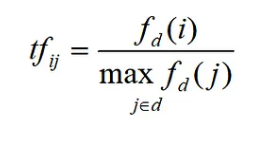

Inverse Document Frequency (IDF)

IDF berfungsi mengurangi bobot suatu term jika kemunculannya banyak tersebar diseluruh dokumen, dituliskan dalam bentuk.
N adalah jumlah total document dalam corpus, N =|D|.

|{d ∈ D : t ∈ d}| = df(t) , adalah jumlah dokumen yang mengandung term t.

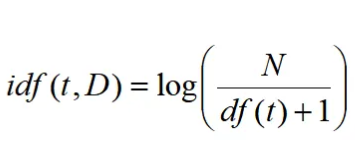

In [174]:
X = data['Abstrak']
y = data['Kategori']

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = TfidfVectorizer()
countvectorizer = CountVectorizer()

# hasil fit_transfrom
X_train_tfidf = vectorizer.fit_transform(X)

vectorizer.fit(X)
# save tf-idf
filename = '/content/drive/MyDrive/prosaindata/model/vectorizer.sav'
joblib.dump(vectorizer,filename)

# menghitung jumlah
count_wm = countvectorizer.fit_transform(X)

# menampilkan hasil dan jumlah dari tfidf
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = vectorizer.get_feature_names_out()

df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = X_train_tfidf.toarray(),columns = tfidf_tokens)

print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

     255a71ccb840217a2fb5ad7432832a0716ac147cpack  aahperd  abad  abadi  abai  \
0                                               0        0     0      0     0   
1                                               0        0     0      0     0   
2                                               0        0     0      0     0   
3                                               0        0     0      0     0   
4                                               0        0     0      0     0   
..                                            ...      ...   ...    ...   ...   
800                                             0        0     0      0     0   
801                                             0        0     0      0     0   
802                                             0        0     0      0     0   
803                                             0        0     0      0     0   
804                                             0        0     0      0     0   

     abdi

### Implementasi ke PCA

PCA atau Analisis Komponen Utama (Principal Component Analysis) adalah analisis multivariate yang mentransformasi variabel-variabel asal yang saling berkorelasi menjadi variabel-variabel baru yang tidak saling berkorelasi dengan mereduksi sejumlah variabel tersebut sehingga mempunyai dimensi yang lebih kecil namun dapat menerangkan sebagian besar keragaman variabel aslinya.

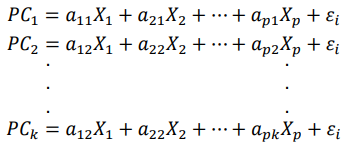

Jumlah kolom `sebelum` menggunakan PCA

In [176]:
X_train_tfidf.shape

(805, 5535)

In [177]:
from sklearn.decomposition import PCA

# Run PCA over the features.
pca = PCA(n_components=3)
X = pca.fit_transform(X_train_tfidf.toarray())



Jumlah Kolom `sesudah` menggunakan PCA

In [178]:
X.shape

(805, 3)

In [179]:
y.shape

(805,)

In [180]:
y

0      1
1      1
2      1
3      0
4      1
      ..
800    0
801    0
802    0
803    0
804    0
Name: Kategori, Length: 805, dtype: int8

### Split Data

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Eksekusi ke Model

### K-means Clustering

In [182]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


#### Untuk Percobaan n_component =1-25

In [183]:
# menentukan 
scores = []
for i in range(1,51):
  # Run PCA over the features.
  pca = PCA(n_components=i)
  X = pca.fit_transform(X_train_tfidf.toarray())
  # Number of clusters
  kmeans = KMeans(n_clusters=2)
  # Fitting the input data
  kmeans = kmeans.fit(X)
  # Getting the cluster labels
  labels = kmeans.predict(X)
  # Centroid values
  centroids = kmeans.cluster_centers_
  hasil = kmeans.fit_transform(X)
  acc = accuracy_score(y, labels)
  scores.append(acc)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

#### Hasil Akurasi Tertinggi 

In [184]:
indmax = scores.index(max(scores)) + 1
valuemax = max(scores)
print(f'Hasil Akurasi Tertinggi Dengan n_components = \033[1m{indmax}\033[0m dengan Akurasi Sebesar \033[1m{valuemax}\033[0m')

Hasil Akurasi Tertinggi Dengan n_components = 12 dengan Akurasi Sebesar 0.537888198757764


Hasil Akurasi Pada Plot

Text(0, 0.5, 'Testing Accuracy')

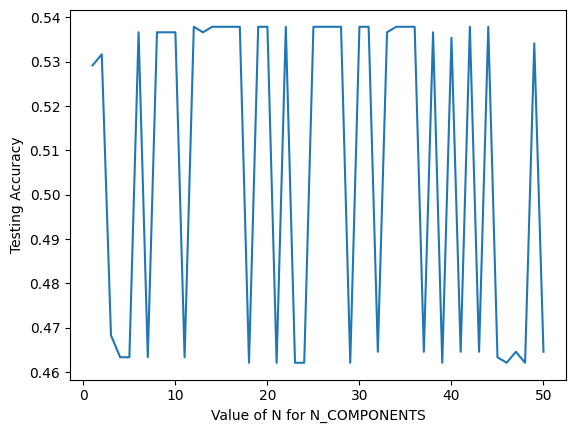

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
n_com = [i for i in range(1,51)]
#plot the relationship between K and the testing accuracy
plt.plot(n_com,scores)
plt.xlabel('Value of N for N_COMPONENTS')
plt.ylabel('Testing Accuracy')

### Gausian Naive Bayes

#### inisialisasi libary

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


karena mencari akurasi yang tertinggi dari `n_component` maka akan dilakukan perulangan 

#### Untuk Percobaan n_component = 1-25

In [187]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Kategori, dtype: int8

In [188]:
n_com = range(1,26)
scores_list = []

for i in n_com:
  # Run PCA over the features.
  pca = PCA(n_components=i)
  X = pca.fit_transform(X_train_tfidf.toarray())
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # eksekusi ke model
  clf2 = GaussianNB()
  clf2.fit(X_train, y_train)
  # save model
  # save model nb
  filename = '/content/drive/MyDrive/prosaindata/model/gnb'+str(i)+'.pkl'
  joblib.dump(clf2, filename) 
  y_pred = clf2.predict(X_test)
  probas = clf2.predict_proba(X_test)[:,1]
  probas = probas.round()
  acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
  # memasukkan hasil akurasi setiap n ke list
  scores_list.append(acc_nb)

scores_list[:5]

[69.57, 57.76, 68.32, 79.5, 66.46]

#### Hasil Akurasi Tertinggi

`scores_list.index(max(scores_list)) + 1`. +1 karena list dimulai dari index 0

In [189]:
indmax = scores_list.index(max(scores_list)) + 1
valuemax = max(scores_list)
print(f'Hasil Akurasi Tertinggi Dengan n_components = \033[1m{indmax}\033[0m dengan Akurasi Sebesar \033[1m{valuemax}\033[0m')

Hasil Akurasi Tertinggi Dengan n_components = 7 dengan Akurasi Sebesar 80.12


In [190]:
# Karena Hasil Tersebut Maka yang akan disimpan n_components = 4
pca = PCA(n_components=indmax)
pca.fit(X_train_tfidf.toarray())
filename = '/content/drive/MyDrive/prosaindata/model/pcanb.sav'
joblib.dump(pca, filename) 

['/content/drive/MyDrive/prosaindata/model/pcanb.sav']

#### Hasil Akurasi Pada Plot

Text(0, 0.5, 'Testing Accuracy')

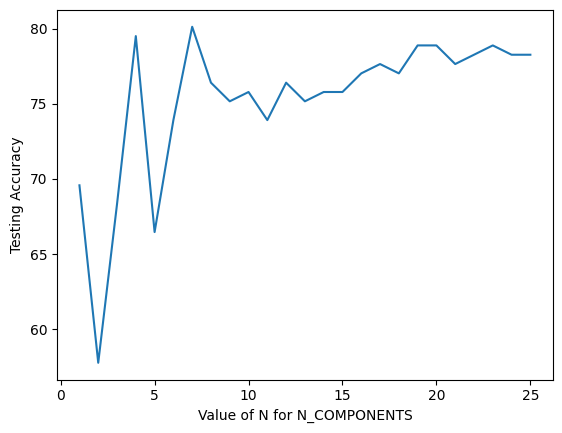

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(n_com,scores_list)
plt.xlabel('Value of N for N_COMPONENTS')
plt.ylabel('Testing Accuracy')

### k-Nearest Neighbor (k-NN)

#### inisialisasi libary

In [192]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

karena mencari akurasi yang tertinggi dari `n_component` maka akan dilakukan perulangan dan `n_neighbors` dengan value yang sama.

#### Untuk Percobaan n_component 1-25 dan n_neigboars 1-25

In [193]:
n_com = 1
n_nei = range(1,26)
scores = []

while n_com <= 25:
   # Run PCA over the features.
  pca = PCA(n_components=n_com)
  X = pca.fit_transform(X_train_tfidf.toarray())
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  temp = []
  # eksekusi ke model
  for k in n_nei:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        # save model knn        
        filename = '/content/drive/MyDrive/prosaindata/model/knn'+str(k)+'.pkl'
        joblib.dump(knn, filename) 
        y_pred=knn.predict(X_test)
        temp.append(accuracy_score(y_test,y_pred))

  # menyimpan akurasi tertinggi dari setiap N_NEIGHBORS
  scores.append([max(temp) , temp.index(max(temp)) +1 ])
  n_com+=1


In [194]:
scores

[[0.7267080745341615, 13],
 [0.7515527950310559, 25],
 [0.8074534161490683, 9],
 [0.8136645962732919, 9],
 [0.8136645962732919, 9],
 [0.8385093167701864, 5],
 [0.8509316770186336, 7],
 [0.8571428571428571, 5],
 [0.8509316770186336, 19],
 [0.84472049689441, 25],
 [0.8571428571428571, 25],
 [0.84472049689441, 23],
 [0.84472049689441, 9],
 [0.8322981366459627, 3],
 [0.8509316770186336, 3],
 [0.8385093167701864, 23],
 [0.8509316770186336, 9],
 [0.8633540372670807, 7],
 [0.8571428571428571, 7],
 [0.84472049689441, 11],
 [0.8322981366459627, 7],
 [0.8260869565217391, 18],
 [0.8198757763975155, 7],
 [0.8322981366459627, 7],
 [0.8385093167701864, 7]]

#### Hasil Akurasi Tertinggi

In [195]:
print(f'Hasil Akurasi Tertinggi Dengan n_components = \033[1m{scores.index(max(scores))}\033[0m dan n_neighbors = \033[1m{max(scores)[1]}\033[0m dengan Akurasi Sebesar \033[1m{max(scores)[0]}\033[0m')

Hasil Akurasi Tertinggi Dengan n_components = 17 dan n_neighbors = 7 dengan Akurasi Sebesar 0.8633540372670807


In [196]:
# Karena hasil tersebut maka n_components = 17 akan disimpan
pca = PCA(n_components=scores.index(max(scores)))
pca.fit(X_train_tfidf.toarray())
filename = '/content/drive/MyDrive/prosaindata/model/pcaknn.sav'
joblib.dump(pca, filename) 



['/content/drive/MyDrive/prosaindata/model/pcaknn.sav']

#### Hasil Akurasi pada Plot

Text(0, 0.5, 'Testing Accuracy')

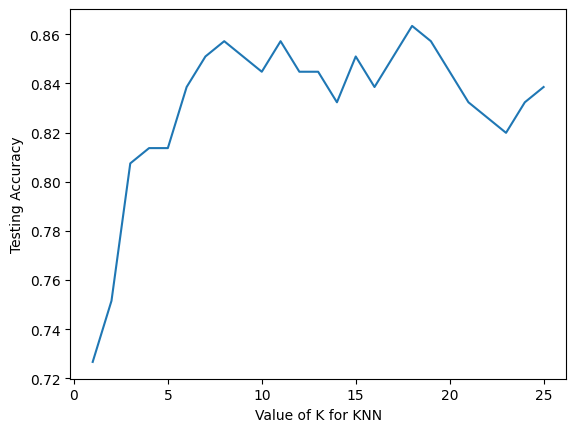

In [197]:
plt.plot(n_nei,[i[0] for i in scores])
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')